In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
psf = np.genfromtxt('elena_cats/HOROLOGIUM_CF.1.PSF.CAT',names=True)
aper = np.genfromtxt('elena_cats/HOROLOGIUM_CF.2.APER.CAT',names=True)

pix_d6 = np.genfromtxt('hor1dir6pix/HORI_pix_2212_d6_dist.dat',names=True)
# pix_d4 = np.genfromtxt('hor1dir0501/HORI_pix_0501_d4.dat',names=True) 
pix_d4 = np.genfromtxt('hor1dir0501/HORI_pix_0501_d4_dist.dat',names=True) 
pix_d2 = np.genfromtxt('hor1dir2312/HORI_pix_2312_d2.dat',names=True) 

uncut = np.genfromtxt('hor1dir2/HORI_final_1712.dat',names=True)

In [3]:
drc_data = np.genfromtxt('/Users/hr8jz/Box Sync/Research/source_lists/june13/HOROLOGIUM-I_sfErr.dat',names=True)

In [4]:
cloud = np.genfromtxt('hor1dir0501/cloud_from_topcat.dat',names=True)

In [5]:
tight_psf = np.genfromtxt('elena_cats/tight_seq_psf.dat',names=True)
tight_d6 = np.genfromtxt('hor1dir6pix/tight_seq_d6.dat',names=True)
tight_d4 = np.genfromtxt('hor1dir0501/tight_seq_d4.dat',names=True) 

In [3]:
print('6 Pix',len(pix_d6))
print('4 Pix',len(pix_d4))
print('2 Pix',len(pix_d2))

6 Pix 1232
4 Pix 1225
2 Pix 1225


In [10]:
len(pix_d4[pix_d4['num_abv_std_f606w']>1])

25

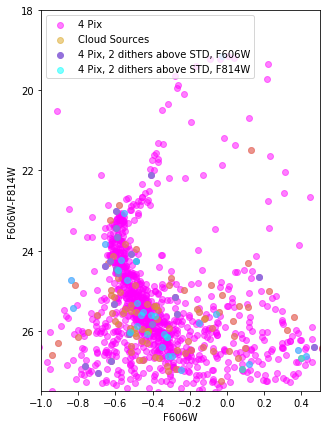

In [22]:
fig,ax = plt.subplots(figsize=(5,7))

ax.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')
ax.scatter(cloud['mean_f606w']-cloud['mean_f814w'],cloud['mean_f606w'],
           label='Cloud Sources',alpha=0.5,color='goldenrod')

ax.scatter(pix_d4['mean_f606w'][pix_d4['num_abv_std_f606w']>1]-pix_d4['mean_f814w'][pix_d4['num_abv_std_f606w']>1],
           pix_d4['mean_f606w'][pix_d4['num_abv_std_f606w']>1],
           label='4 Pix, 2 dithers above STD, F606W',color='mediumpurple')
ax.scatter(pix_d4['mean_f606w'][pix_d4['num_abv_std_f814w']>1]-pix_d4['mean_f814w'][pix_d4['num_abv_std_f814w']>1],
           pix_d4['mean_f606w'][pix_d4['num_abv_std_f814w']>1],
           label='4 Pix, 2 dithers above STD, F814W',color='aqua',alpha=0.5)

ax.legend()
ax.set_ylim(27.5,18)
ax.set_xlim(-1,0.5)
ax.set_ylabel('F606W-F814W')
ax.set_xlabel('F606W')

plt.show()

In [27]:
f606w_arr_2dith = pix_d4[pix_d4['num_abv_std_f606w']>1]
f814w_arr_2dith = pix_d4[pix_d4['num_abv_std_f814w']>1]

In [50]:
len(pix_d4['mean_f814w'][pix_d4['num_abv_std_f814w']>1])

32

In [30]:
wo = open('reg_2badDith_f606w.reg','w')
for kk in range(len(f606w_arr_2dith)):
    wo.write('{0:1.4f} {1:1.4f} \n'.format(f606w_arr_2dith['xr_1_f606w'][kk],\
                                    f606w_arr_2dith['yr_1_f606w'][kk]))
    wo.write('{0:1.4f} {1:1.4f} \n'.format(f606w_arr_2dith['xr_2_f606w'][kk],\
                                    f606w_arr_2dith['yr_2_f606w'][kk]))
    wo.write('{0:1.4f} {1:1.4f} \n'.format(f606w_arr_2dith['xr_3_f606w'][kk],\
                                    f606w_arr_2dith['yr_3_f606w'][kk]))
    wo.write('{0:1.4f} {1:1.4f} \n'.format(f606w_arr_2dith['xr_4_f606w'][kk],\
                                    f606w_arr_2dith['yr_4_f606w'][kk]))
    
wo.close()

In [31]:
wo = open('reg_2badDith_f814w.reg','w')
for kk in range(len(f814w_arr_2dith)):
    wo.write('{0:1.4f} {1:1.4f} \n'.format(f814w_arr_2dith['xr_1_f814w'][kk],\
                                    f814w_arr_2dith['yr_1_f814w'][kk]))
    wo.write('{0:1.4f} {1:1.4f} \n'.format(f814w_arr_2dith['xr_2_f814w'][kk],\
                                    f814w_arr_2dith['yr_2_f814w'][kk]))
    wo.write('{0:1.4f} {1:1.4f} \n'.format(f814w_arr_2dith['xr_3_f814w'][kk],\
                                    f814w_arr_2dith['yr_3_f814w'][kk]))
    wo.write('{0:1.4f} {1:1.4f} \n'.format(f814w_arr_2dith['xr_4_f814w'][kk],\
                                    f814w_arr_2dith['yr_4_f814w'][kk]))
    
wo.close()

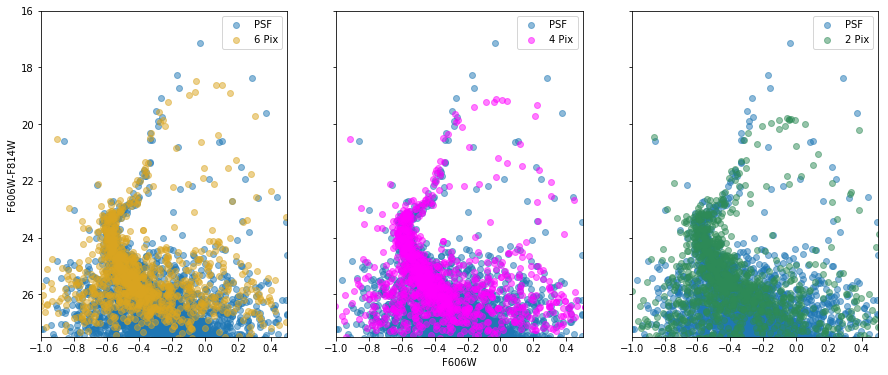

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5)
ax1.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax2.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5)
ax2.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5)
ax3.scatter(pix_d2['mean_f606w']-pix_d2['mean_f814w'],pix_d2['mean_f606w'],
           label='2 Pix',alpha=0.5,color='seagreen',zorder=1)

ax1.legend()
ax1.set_ylim(27.5,16)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606W-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,16)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,16)
ax3.set_xlim(-1,0.5)

plt.show()

# Plots for Quals

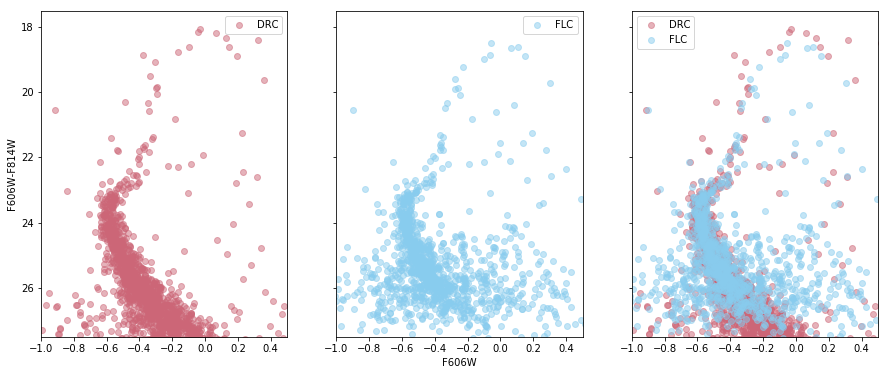

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)


ax1.scatter(drc_data['magRaw_v']-drc_data['magRaw_i'],drc_data['magRaw_v'],\
           label='DRC',alpha=0.5,color='#CC6677') #salmon

# ax1.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5)
ax2.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='FLC',alpha=0.5,color='#88CCEE')#sky

# ax2.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5)
# ax2.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
#            label='4 Pix',alpha=0.5,color='magenta')

# ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5)
# ax3.scatter(pix_d2['mean_f606w']-pix_d2['mean_f814w'],pix_d2['mean_f606w'],
#            label='2 Pix',alpha=0.5,color='seagreen',zorder=1)

ax3.scatter(drc_data['magRaw_v']-drc_data['magRaw_i'],drc_data['magRaw_v'],\
           label='DRC',alpha=0.5,color='#CC6677')
ax3.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='FLC',alpha=0.5,color='#88CCEE')

ax1.legend()
ax1.set_ylim(27.5,17.5)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606W-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,17.5)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,17.5)
ax3.set_xlim(-1,0.5)

# plt.show()
plt.savefig('images/flc_drc_3block.png')

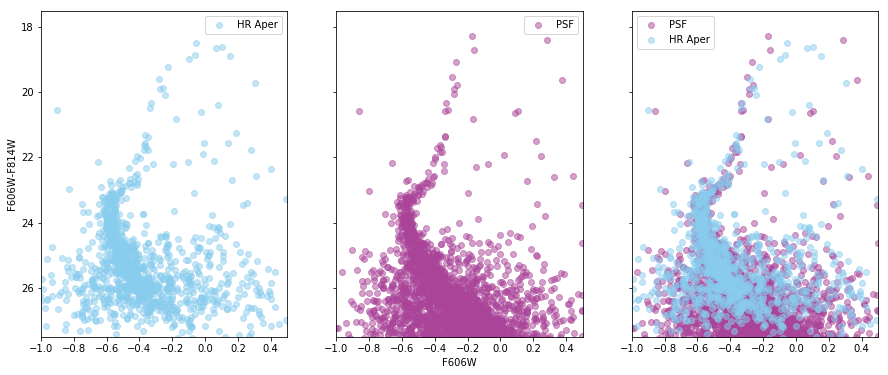

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)


# ax1.scatter(drc_data['magRaw_v']-drc_data['magRaw_i'],drc_data['magRaw_v'],\
#            label='DRC',alpha=0.5,color='coral')

# ax1.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5)
ax1.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='HR Aper',alpha=0.5,color='#88CCEE')

ax2.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5,color='#AA4499') #orchid
# ax2.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
#            label='4 Pix',alpha=0.5,color='magenta')

# ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5)
# ax3.scatter(pix_d2['mean_f606w']-pix_d2['mean_f814w'],pix_d2['mean_f606w'],
#            label='2 Pix',alpha=0.5,color='seagreen',zorder=1)

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5,color='#AA4499')
ax3.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='HR Aper',alpha=0.5,color='#88CCEE')


ax1.legend()
ax1.set_ylim(27.5,17.5)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606W-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,17.5)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,17.5)
ax3.set_xlim(-1,0.5)

# plt.show()
plt.savefig('images/han_mat_3block.png')

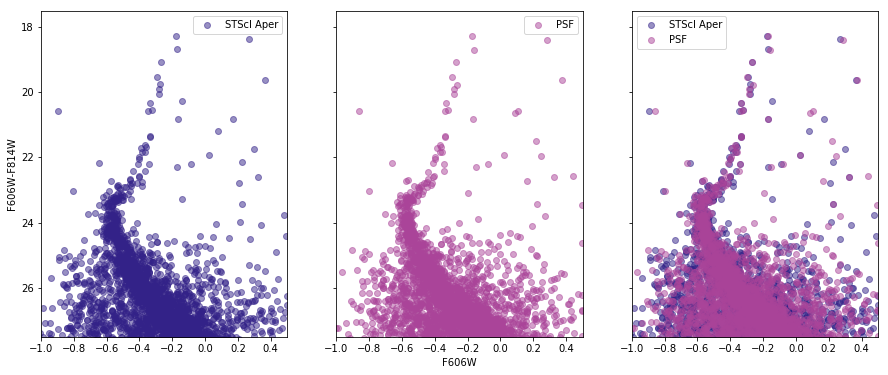

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)


ax1.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='STScI Aper',alpha=0.5,color='#332288') #navy
# ax1.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
#            label='HR Aper',alpha=0.5,color='dodgerblue')

ax2.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5,color='#AA4499')

ax3.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='STScI Aper',alpha=0.5,color='#332288')
ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5,color='#AA4499')

ax1.legend()
ax1.set_ylim(27.5,17.5)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606W-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,17.5)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,17.5)
ax3.set_xlim(-1,0.5)

# plt.show()
plt.savefig('images/mat_psf_3block.png')

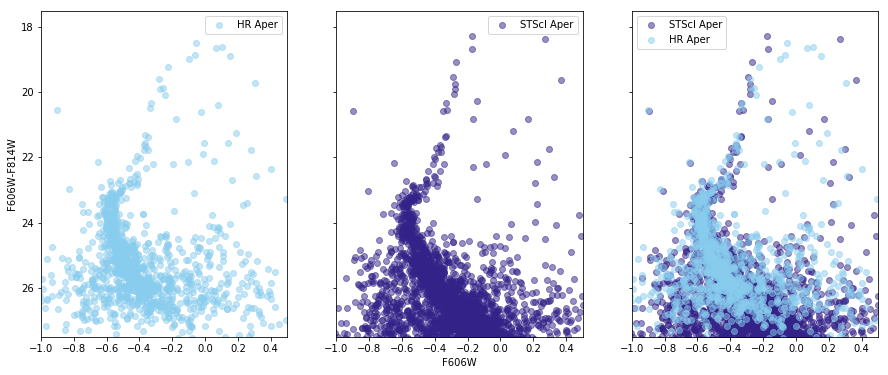

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)


# ax1.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='STSCi APER',alpha=0.5,color='mediumaquamarine')
ax1.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='HR Aper',alpha=0.5,color='#88CCEE')

# ax2.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5,color='magenta')

ax2.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='STScI Aper',alpha=0.5,color='#332288')



ax3.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='STScI Aper',alpha=0.5,color='#332288')
ax3.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='HR Aper',alpha=0.5,color='#88CCEE',zorder=1)

ax1.legend()
ax1.set_ylim(27.5,17.5)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606W-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,17.5)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,17.5)
ax3.set_xlim(-1,0.5)

# plt.show()
plt.savefig('images/mat_han_3block.png')

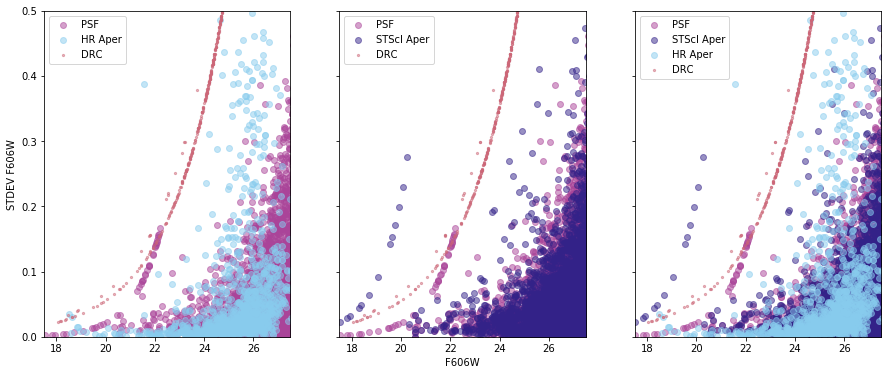

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

# ax1.scatter(aper['m606c'],aper['s606'],label='aper',alpha=0.5)
ax1.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5,color='#AA4499')
ax1.scatter(pix_d6['mean_f606w'],pix_d6['stdev_f606w'],
           label='HR Aper',alpha=0.5,color='#88CCEE')
ax1.scatter(drc_data['magRaw_v'],drc_data['magErr_v'],\
          label='DRC',s=5,alpha=0.5,color='#CC6677')

ax2.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5,color='#AA4499')
ax2.scatter(aper['m606c'],aper['s606'],label='STScI Aper',alpha=0.5,color='#332288')
ax2.scatter(drc_data['magRaw_v'],drc_data['magErr_v'],\
          label='DRC',s=5,alpha=0.5,color='#CC6677')
# ax2.scatter(pix_d6['mean_f606w'],pix_d6['stdev_f606w'],
#            label='6 Pix',alpha=0.5,color='goldenrod')
ax3.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5,color='#AA4499')
ax3.scatter(aper['m606c'],aper['s606'],label='STScI Aper',alpha=0.5,color='#332288')
ax3.scatter(pix_d6['mean_f606w'],pix_d6['stdev_f606w'],
           label='HR Aper',alpha=0.5,color='#88CCEE')
ax3.scatter(drc_data['magRaw_v'],drc_data['magErr_v'],\
          label='DRC',s=5,alpha=0.5,color='#CC6677')


ax1.legend()
ax1.set_ylim(0,0.5)
ax1.set_xlim(17.5,27.5)
ax1.set_ylabel('STDEV F606W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(0,0.5)
ax2.set_xlim(17.5,27.5)

ax3.legend()
ax3.set_ylim(0,0.5)
ax3.set_xlim(17.5,27.5)

# plt.show()
plt.savefig('images/error_3block.png')

# End Qual Plots

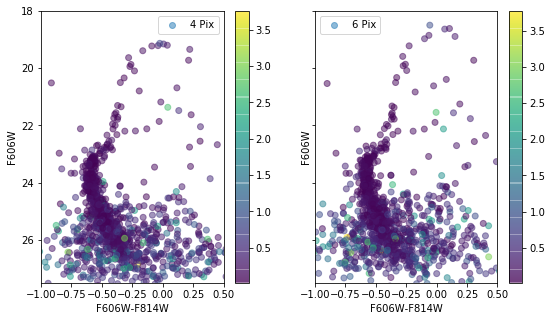

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9,5),sharey=True)

ima=ax1.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,cmap='viridis',c=pix_d4['pos_std_f606w'])

ima2=ax2.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='6 Pix',alpha=0.5,cmap='viridis',c=pix_d6['pos_std_f606w'])

ax1.set_ylim(27.5,18)
ax1.set_xlim(-1,0.5)
ax1.set_xlabel('F606W-F814W')
ax1.set_ylabel('F606W')
ax1.legend()

ax2.set_ylim(27.5,18)
ax2.set_xlim(-1,0.5)
ax2.set_ylabel('F606W')
ax2.set_xlabel('F606W-F814W')
ax2.legend()

norm = mpl.colors.Normalize(vmin=np.min(pix_d4['pos_std_f606w']), 
                            vmax=np.max(pix_d4['pos_std_f606w']))


# cm = ['viridis', 'viridis']

# pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
#                             cmap=cm[col])
plt.colorbar(ima, ax=ax1)

plt.colorbar(ima2,ax=ax2)

plt.show()

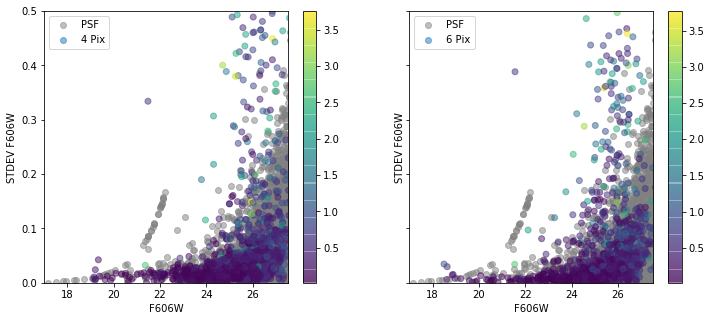

In [51]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharey=True)

ax1.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5,color='grey')
ax2.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5,color='grey')

ima=ax1.scatter(pix_d4['mean_f606w'],pix_d4['stdev_f606w'],
           label='4 Pix',alpha=0.5,cmap='viridis',c=pix_d4['pos_std_f606w'])
ima2=ax2.scatter(pix_d6['mean_f606w'],pix_d6['stdev_f606w'],
           label='6 Pix',alpha=0.5,cmap='viridis',c=pix_d6['pos_std_f606w'])

ax1.set_ylim(0,0.5)
ax1.set_xlim(17,27.5)
ax1.set_ylabel('STDEV F606W')
ax1.set_xlabel('F606W')
ax1.legend()


ax2.set_ylim(0,0.5)
ax2.set_xlim(17,27.5)
ax2.set_ylabel('STDEV F606W')
ax2.set_xlabel('F606W')
ax2.legend()


norm = mpl.colors.Normalize(vmin=np.min(pix_d4['pos_std_f606w']), 
                            vmax=np.max(pix_d4['pos_std_f606w']))

plt.colorbar(ima, ax=ax1)
plt.colorbar(ima2,ax=ax2)

plt.show()

In [ ]:
magbins = np.arange(18,28.5,0.25) 
# find median color of the sources in each magnitude range

# Plots showing CMDs and errors for aperture comparisons

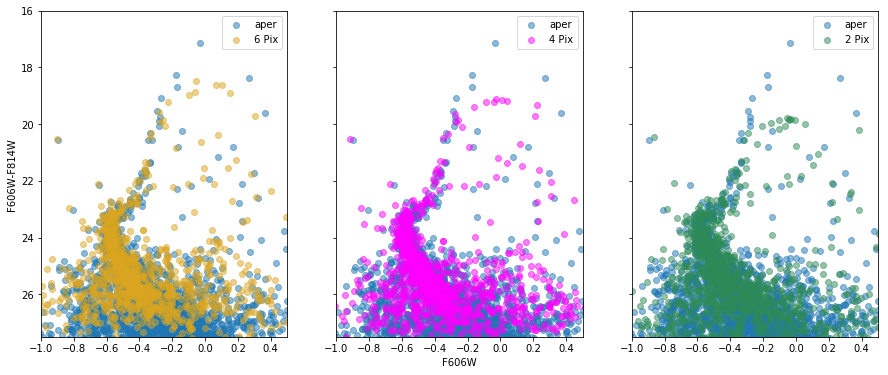

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5)
ax1.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax2.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5)
ax2.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax3.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5)
ax3.scatter(pix_d2['mean_f606w']-pix_d2['mean_f814w'],pix_d2['mean_f606w'],
           label='2 Pix',alpha=0.5,color='seagreen',zorder=1)

ax1.legend()
ax1.set_ylim(27.5,16)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606W-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,16)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,16)
ax3.set_xlim(-1,0.5)

plt.show()

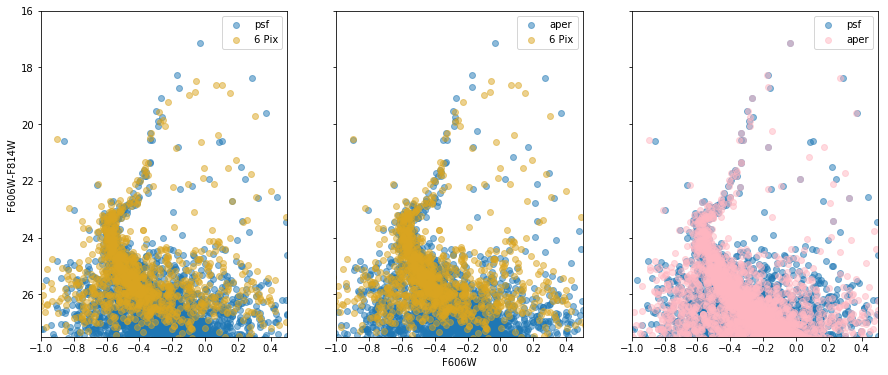

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='psf',alpha=0.5)
ax1.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax2.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5)
ax2.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='psf',alpha=0.5)
ax3.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5,color='lightpink')


ax1.legend()
ax1.set_ylim(27.5,16)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606W-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,16)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,16)
ax3.set_xlim(-1,0.5)

plt.show()

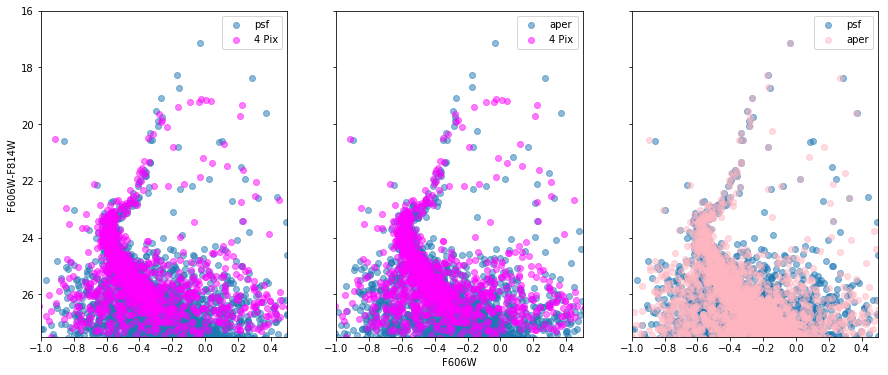

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='psf',alpha=0.5)
ax1.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax2.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5)
ax2.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='psf',alpha=0.5)
ax3.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5,color='lightpink')


ax1.legend()
ax1.set_ylim(27.5,16)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606W-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,16)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,16)
ax3.set_xlim(-1,0.5)

plt.show()

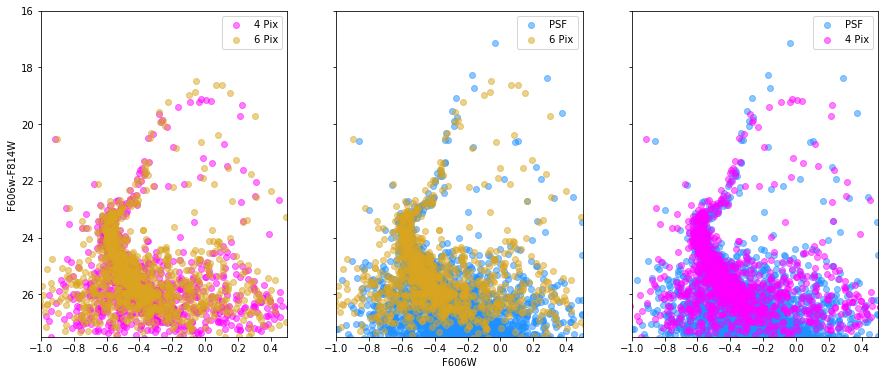

In [51]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

# ax1.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5,color='dodgerblue')
# ax1.scatter(uncut['median_f606w']-uncut['median_f814w'],uncut['median_f606w'],
#            label='Uncut, Sph',alpha=0.5,color='maroon',zorder=1)

ax1.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')
ax1.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax2.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5,color='dodgerblue')
ax2.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',alpha=0.5,color='dodgerblue')
ax3.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')



ax1.legend()
ax1.set_ylim(27.5,16)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606w-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,16)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,16)
ax3.set_xlim(-1,0.5)

plt.show()

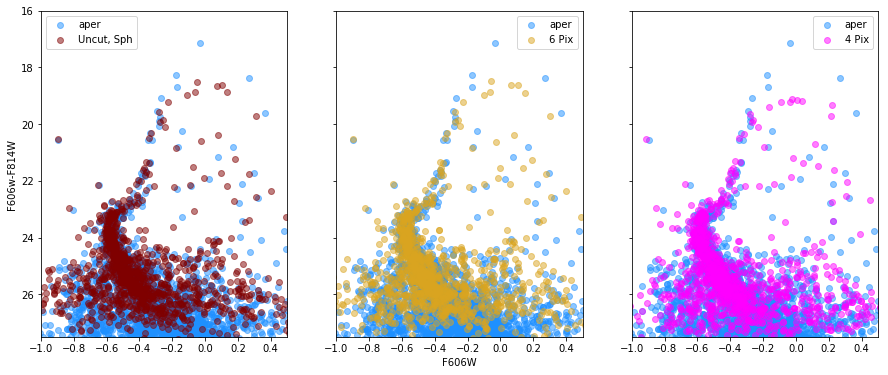

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5,color='dodgerblue')
ax1.scatter(uncut['median_f606w']-uncut['median_f814w'],uncut['median_f606w'],
           label='Uncut, Sph',alpha=0.5,color='maroon',zorder=1)

ax2.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5,color='dodgerblue')
ax2.scatter(pix_d6['mean_f606w']-pix_d6['mean_f814w'],pix_d6['mean_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax3.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5,color='dodgerblue')
ax3.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')



ax1.legend()
ax1.set_ylim(27.5,16)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606w-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,16)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,16)
ax3.set_xlim(-1,0.5)

plt.show()

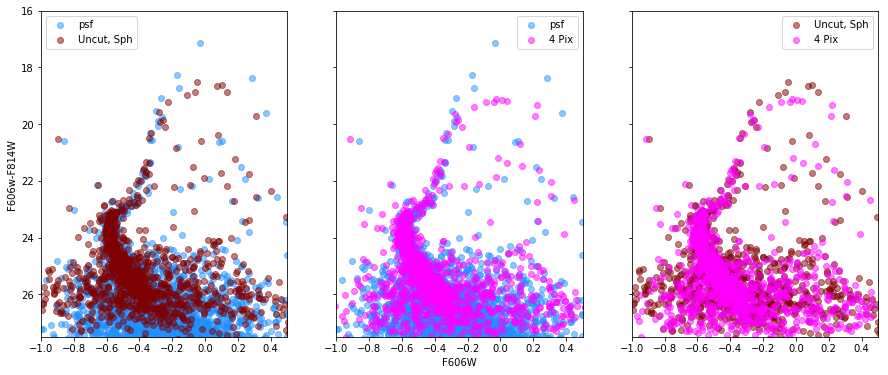

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='psf',alpha=0.5,color='dodgerblue')
ax1.scatter(uncut['median_f606w']-uncut['median_f814w'],uncut['median_f606w'],
           label='Uncut, Sph',alpha=0.5,color='maroon',zorder=1)

ax2.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='psf',alpha=0.5,color='dodgerblue')
ax2.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax3.scatter(uncut['median_f606w']-uncut['median_f814w'],uncut['median_f606w'],
           label='Uncut, Sph',alpha=0.5,color='maroon',zorder=1)
ax3.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax1.legend()
ax1.set_ylim(27.5,16)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606w-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,16)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,16)
ax3.set_xlim(-1,0.5)

plt.show()

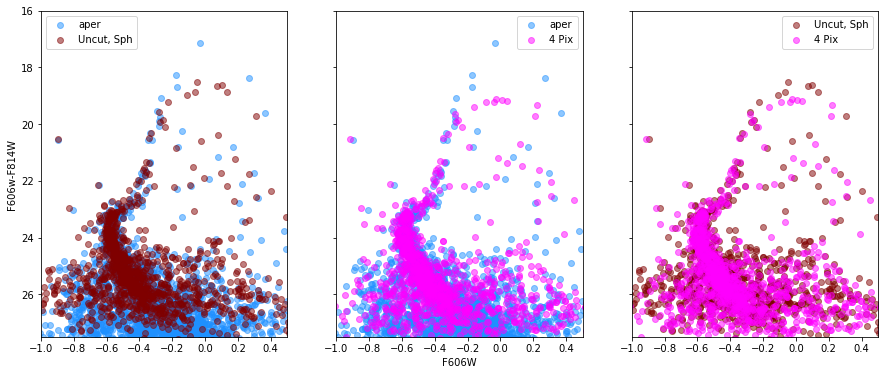

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5,color='dodgerblue')
ax1.scatter(uncut['median_f606w']-uncut['median_f814w'],uncut['median_f606w'],
           label='Uncut, Sph',alpha=0.5,color='maroon',zorder=1)

ax2.scatter(aper['m606c']-aper['m814c'],aper['m606c'],label='aper',alpha=0.5,color='dodgerblue')
ax2.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax3.scatter(uncut['median_f606w']-uncut['median_f814w'],uncut['median_f606w'],
           label='Uncut, Sph',alpha=0.5,color='maroon',zorder=1)
ax3.scatter(pix_d4['mean_f606w']-pix_d4['mean_f814w'],pix_d4['mean_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax1.legend()
ax1.set_ylim(27.5,16)
ax1.set_xlim(-1,0.5)
ax1.set_ylabel('F606w-F814W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(27.5,16)
ax2.set_xlim(-1,0.5)

ax3.legend()
ax3.set_ylim(27.5,16)
ax3.set_xlim(-1,0.5)

plt.show()

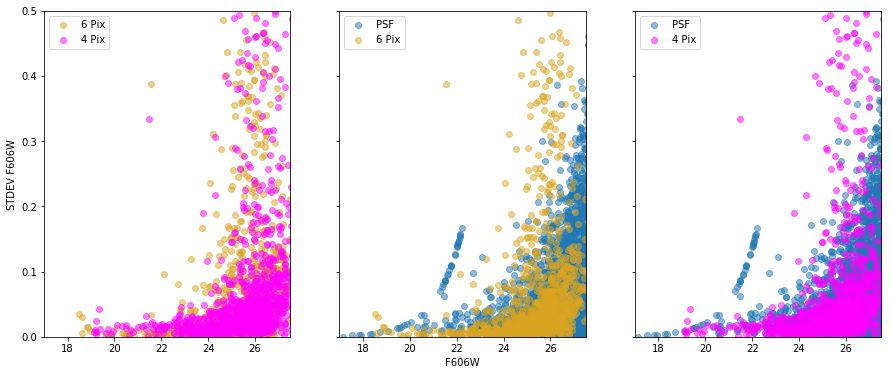

In [52]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

# ax1.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5)
# ax1.scatter(uncut['median_f606w'],uncut['stdev_f606w'],
#            label='Uncut',alpha=0.5,color='maroon')

# ax2.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5)
ax1.scatter(pix_d6['mean_f606w'],pix_d6['stdev_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')
ax1.scatter(pix_d4['mean_f606w'],pix_d4['stdev_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax2.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5)
ax2.scatter(pix_d6['mean_f606w'],pix_d6['stdev_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax3.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5)
ax3.scatter(pix_d4['mean_f606w'],pix_d4['stdev_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax1.legend()
ax1.set_ylim(0,0.5)
ax1.set_xlim(17,27.5)
ax1.set_ylabel('STDEV F606W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(0,0.5)
ax2.set_xlim(17,27.5)

ax3.legend()
ax3.set_ylim(0,0.5)
ax3.set_xlim(17,27.5)

plt.show()

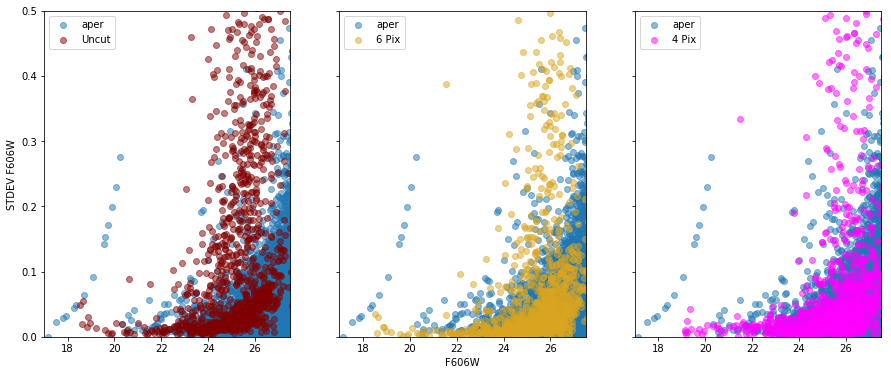

In [33]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(aper['m606c'],aper['s606'],label='aper',alpha=0.5)
ax1.scatter(uncut['median_f606w'],uncut['stdev_f606w'],
           label='Uncut',alpha=0.5,color='maroon')

ax2.scatter(aper['m606c'],aper['s606'],label='aper',alpha=0.5)
ax2.scatter(pix_d6['mean_f606w'],pix_d6['stdev_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax3.scatter(aper['m606c'],aper['s606'],label='aper',alpha=0.5)
ax3.scatter(pix_d4['mean_f606w'],pix_d4['stdev_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax1.legend()
ax1.set_ylim(0,0.5)
ax1.set_xlim(17,27.5)
ax1.set_ylabel('STDEV F606W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(0,0.5)
ax2.set_xlim(17,27.5)

ax3.legend()
ax3.set_ylim(0,0.5)
ax3.set_xlim(17,27.5)

plt.show()

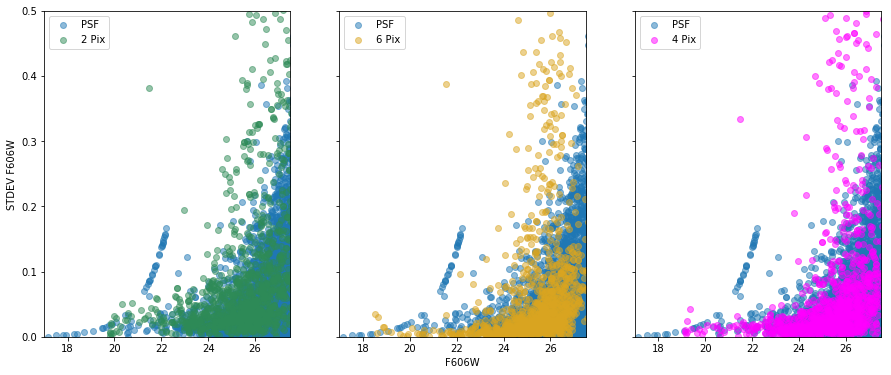

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6),sharey=True)

ax1.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5)
ax1.scatter(pix_d2['mean_f606w'],pix_d2['stdev_f606w'],
           label='2 Pix',alpha=0.5,color='seagreen')


ax2.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5)
ax2.scatter(pix_d6['mean_f606w'],pix_d6['stdev_f606w'],
           label='6 Pix',alpha=0.5,color='goldenrod')

ax3.scatter(psf['m606c'],psf['s606'],label='PSF',alpha=0.5)
ax3.scatter(pix_d4['mean_f606w'],pix_d4['stdev_f606w'],
           label='4 Pix',alpha=0.5,color='magenta')

ax1.legend()
ax1.set_ylim(0,0.5)
ax1.set_xlim(17,27.5)
ax1.set_ylabel('STDEV F606W')
ax2.set_xlabel('F606W')
ax2.legend()
ax2.set_ylim(0,0.5)
ax2.set_xlim(17,27.5)

ax3.legend()
ax3.set_ylim(0,0.5)
ax3.set_xlim(17,27.5)

plt.show()